In [124]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

In [16]:
X = np.random.randn(100, 100)
X_centered = X - X.mean(axis=0)

u, s, vh = np.linalg.svd(X_centered)

c1 = vh.T[:, 0]
c2 = vh.T[:, 1]

In [24]:
sum(map(lambda x: x**2, u[0, :]))**0.5

1.0

In [17]:
vh.shape

(100, 100)

In [28]:
X2D = X_centered.dot(vh.T[:, :2])
X2D[:5]

array([[-0.65511016,  1.53471926],
       [ 0.58123409,  0.41593377],
       [-0.27773958, -0.81095953],
       [ 1.36696028,  1.77367833],
       [ 0.09097728, -2.84117714]])

In [40]:
pca = PCA(50)
X2D = pca.fit_transform(X)

In [36]:
pca.components_.shape

(50, 100)

In [41]:
pca.explained_variance_ratio_

array([0.03846922, 0.03651301, 0.03461789, 0.03193306, 0.03034753,
       0.02918551, 0.02863299, 0.02772559, 0.02721159, 0.02535667,
       0.02492443, 0.02449609, 0.02309982, 0.02263959, 0.02193571,
       0.02151193, 0.02129664, 0.02019905, 0.0195515 , 0.01908112,
       0.0185378 , 0.01801979, 0.01743453, 0.01703933, 0.01647468,
       0.01585387, 0.01570598, 0.01528815, 0.014571  , 0.01430597,
       0.01401822, 0.01358626, 0.01300543, 0.01263835, 0.01209365,
       0.0117335 , 0.01140634, 0.0108769 , 0.01028288, 0.00999509,
       0.00979774, 0.00951932, 0.00887252, 0.00867126, 0.0083192 ,
       0.00789144, 0.00764028, 0.00740892, 0.00691301, 0.00685739])

In [42]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
len(pca.explained_variance_ratio_[cumsum<=0.50])

18

In [49]:
np.argmax(cumsum>0.50)

18

In [52]:
sum(cumsum<=0.50)

18

In [54]:
pca = PCA(n_components=0.95)
X2D = pca.fit_transform(X)
len(pca.components_)

61

<class 'numpy.ndarray'>
(333, 333, 3)


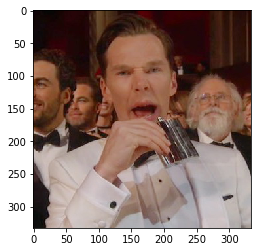

In [77]:
mat = im.imread('img/31KLTJA28_Y_av.jpg')
print(type(mat))
print(mat.shape)
plt.imshow(mat)
plt.show()

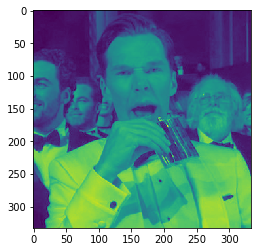

In [85]:
mat_bw = mat.mean(axis=2)
plt.imshow(mat_bw)

n_components: 22


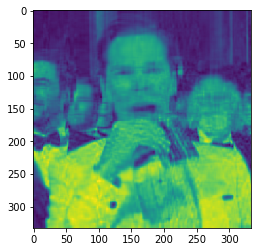

In [93]:
pca = PCA(0.98)
mat_bw_transformed = pca.fit_transform(mat_bw)
print("n_components: %d" % len(pca.components_))
plt.imshow(pca.inverse_transform(mat_bw_transformed))
plt.show()

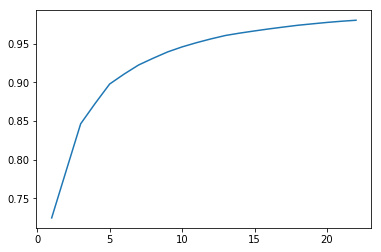

In [123]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(len(cumsum))+1, cumsum)
plt.show()

### Incremental PCA

In [98]:
mnist = fetch_mldata('MNIST original')
X_train, X_test, y_train, y_test =train_test_split(mnist['data'], mnist['target'])

In [99]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train[:1000], n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)    

In [102]:
fname = 'datasets/mnist_data_1000.pkl'
X_train[:1000].dump(fname)

In [103]:
X_train[:1000].shape

(1000, 784)

In [117]:
X_mm = np.memmap(fname, dtype='uint8', mode='readonly', shape=(1000, 784))
batch_size = 784 * 10
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=7840, copy=True, n_components=154, whiten=False)

### Randomized PCA

In [120]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

In [136]:
rbf_pca = KernelPCA(n_components=300, kernel='rbf', gamma=0.04)
mat_bw_reduced = rbf_pca.fit_transform(X_train[:10])
# plt.imshow(rbf_pca.inverse_transform(mat_bw_reduced))

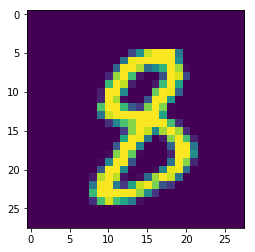

In [141]:
plt.imshow(X_train[0].reshape((28, 28)))
plt.show()